<a href="https://colab.research.google.com/github/AI-short/AI-ML-Projects/blob/main/Diabetes_Diagnosis/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diagnosing Diabetes in Female**

(Min. to Max. value)

  1. Pregnant (0 to 17)
  2. Glucose (44 to 199)
  3. Diastolic_BP (24 to 122)
  4. Skin_Fold (7 to 99)
  5. Serum_Insulin (14 to 846)
  6. BMI (18.2 to 67.1)
  7. Diabetes_Pedigree (0.07 to 2.42)
  8. Age (21 to 81)

In [48]:
# Step 1: Import library
import pandas as pd

In [49]:
# Step 2: Read dataset
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes%20Missing%20Data.csv")

In [50]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [75]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
# Step 3: Data preprocessing
df.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [54]:
# To see how many missing values in each column
df.isna().sum()

,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


In [55]:
import missingno as msno

<Axes: >

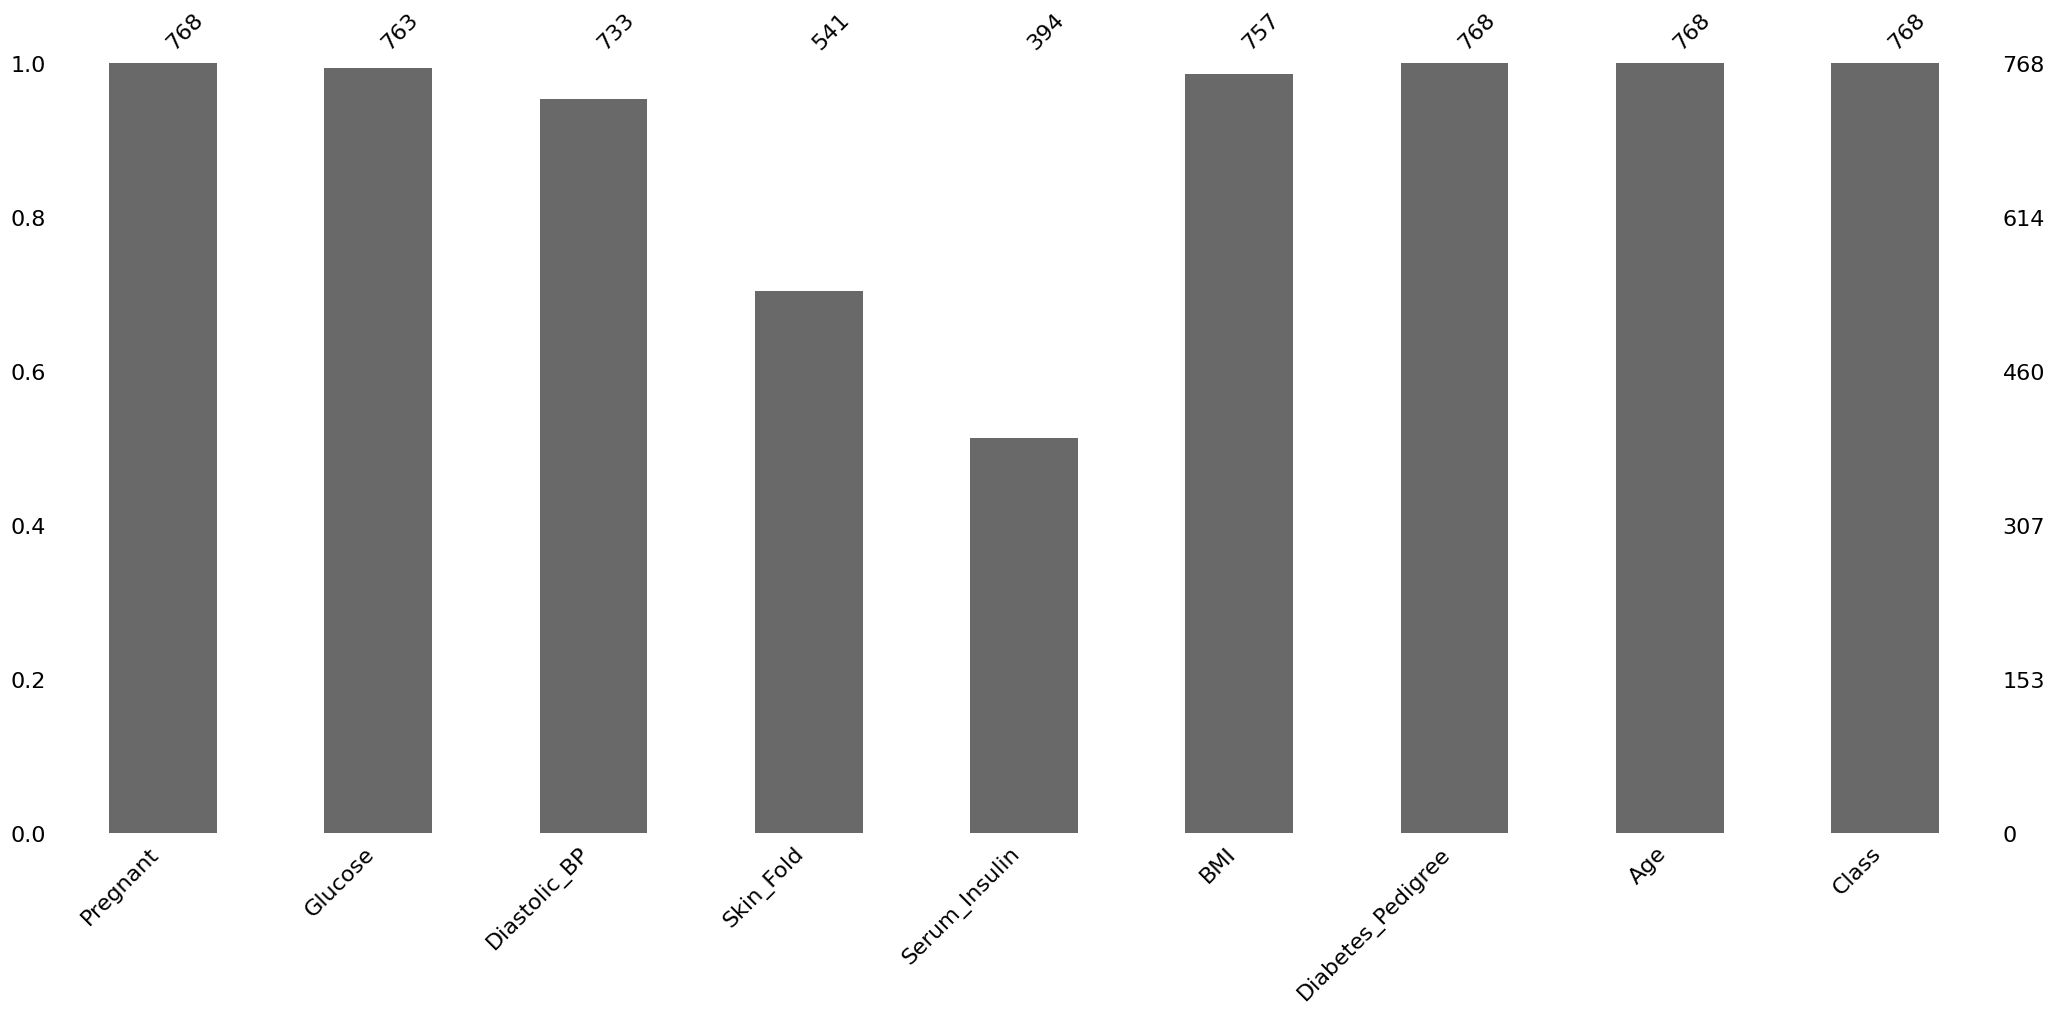

In [56]:
# Visual representation of each column in bar graph
msno.bar(df)

<Axes: >

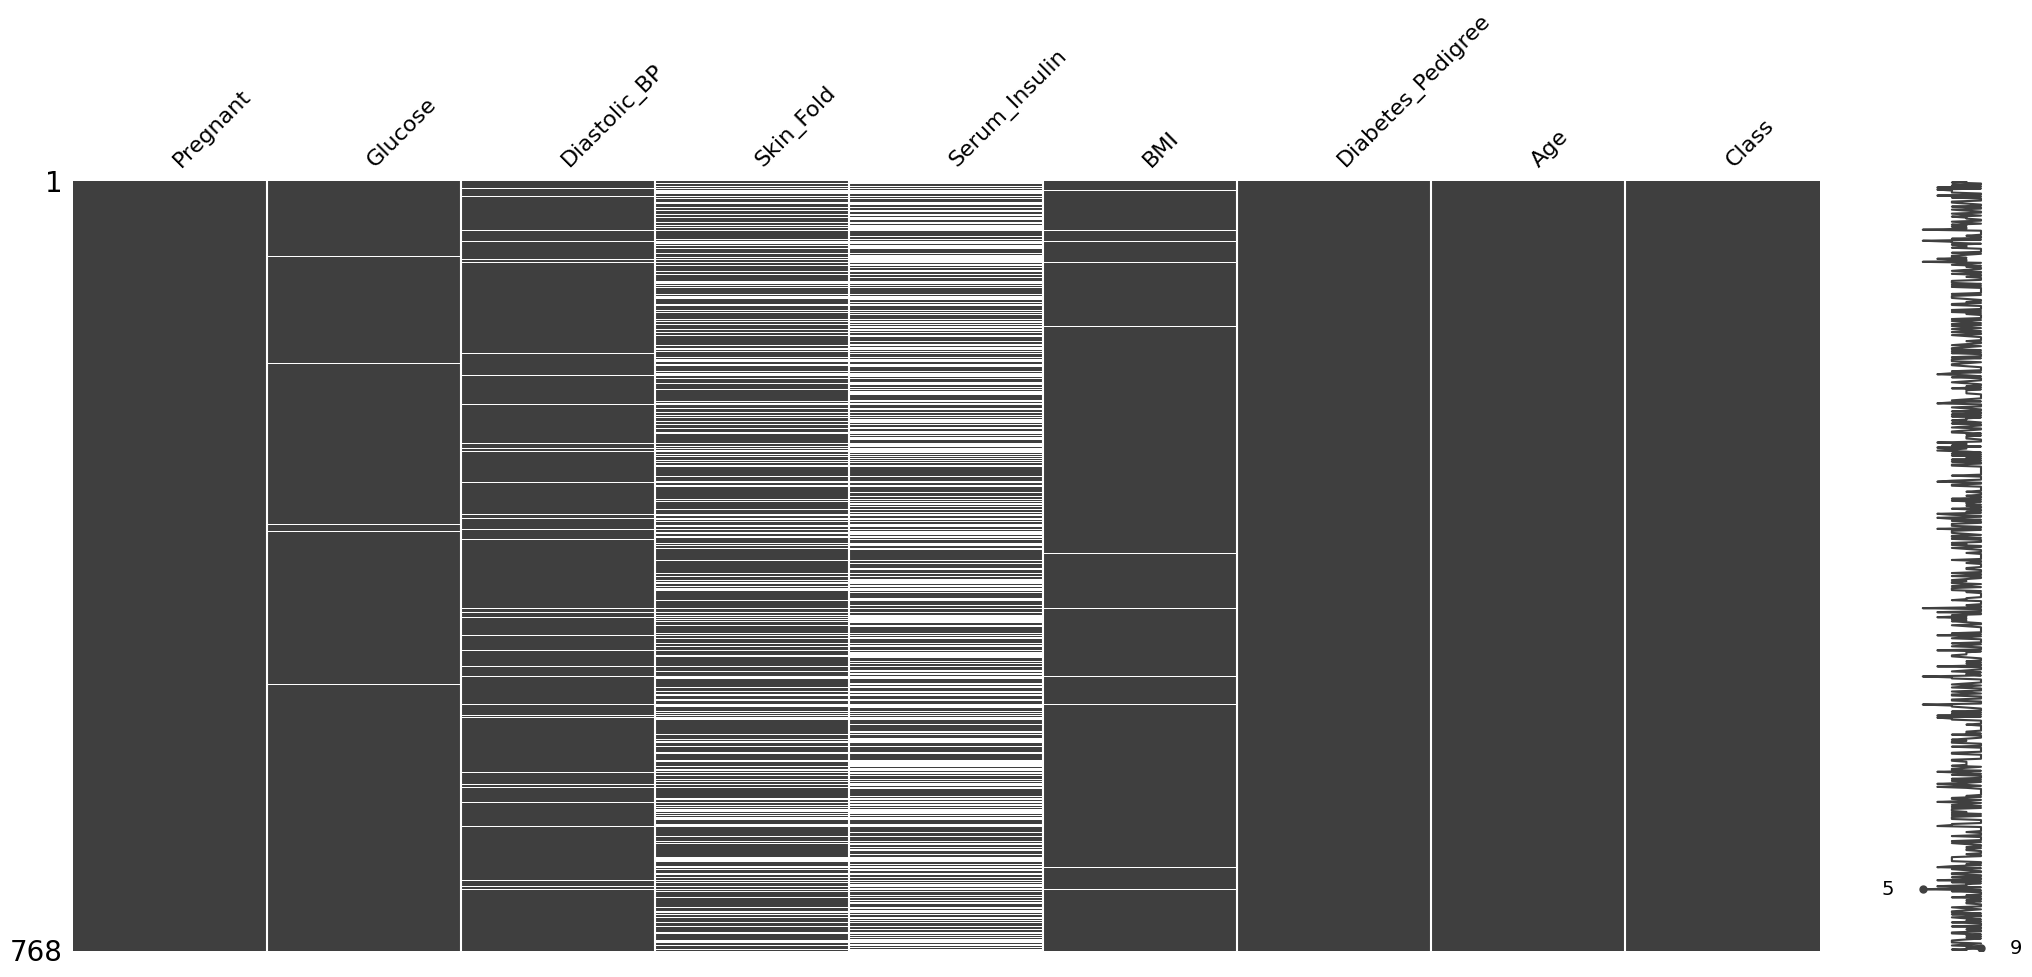

In [57]:
#Visual representation of data set in matrix graph
msno.matrix(df)

In [58]:
# Median of Glucose data
df['Glucose'].median()

117.0

In [59]:
# Filled missing data in Glucose with Median and we have assigned this change to Glucose column
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

In [60]:
# Now we can see no missing data in Glucose column
df['Glucose'].isna().sum()

np.int64(0)

In [61]:
# Mean of 'Diastolic_BP' data
df['Diastolic_BP'].mean()

np.float64(72.40518417462484)

In [62]:
# Filled missing data in Diastolic_BP with Mean and we have assigned this change to Diastolic_BP column
df['Diastolic_BP'] = df['Diastolic_BP'].fillna(df['Diastolic_BP'].mean())

In [63]:
# Mean of 'Skin_Fold' data
df['Skin_Fold'].mean()

np.float64(29.153419593345657)

In [64]:
# Filled missing data in Diastolic_BP with Mean and we have assigned this change to Diastolic_BP column
df['Skin_Fold'] = df['Skin_Fold'].fillna(df['Skin_Fold'].mean())

In [65]:
# Median of 'Serum_Insulin' data
df['Serum_Insulin'].median()

125.0

In [66]:
# Filled missing data in 'Serum_Insulin' with Median and we have assigned this change to 'Serum_Insulin' column
df['Serum_Insulin'] = df['Serum_Insulin'].fillna(df['Serum_Insulin'].median())

In [67]:
# Mean of 'BMI' data
df['BMI'].mean()

np.float64(32.457463672391015)

In [68]:
# Filled missing data in Diastolic_BP with Mean and we have assigned this change to Diastolic_BP column
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [69]:
# To see how many missing values in each column --> Again check
df.isna().sum()

,0
Pregnant,0
Glucose,0
Diastolic_BP,0
Skin_Fold,0
Serum_Insulin,0
BMI,0
Diabetes_Pedigree,0
Age,0
Class,0


## Preprocessing of data done. Now we have no missing value

In [78]:
# Step 4: Define problem (y - output  X - input)
y = df['Class']
X = df[['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age']]

In [80]:
# see x,y, df shape
y.shape, X.shape, df.shape

((768,), (768, 8), (768, 9))

In [81]:
# Step 5: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=2529)

In [82]:
# Step 6: Select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [83]:
# Step 7: Train model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
# Step 8: Predict
y_predict = model.predict(X_test)

In [87]:
# Step 9: Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       355
           1       0.45      0.73      0.56       106

    accuracy                           0.74       461
   macro avg       0.68      0.73      0.68       461
weighted avg       0.80      0.74      0.75       461



Accuracy of the Model is 74 %


## Thank You